In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import re


In [36]:
file_path = 'D:/tweets.csv'
df = pd.read_csv(file_path)

In [38]:
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
print("First few rows:\n", df.head())

Dataset Shape: (14640, 15)
Columns: Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')
First few rows:
              tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin 

In [40]:

def clean_text(text):
    text = re.sub(r'http\S+', '', text) 
    text = re.sub(r'@\w+', '', text)     
    text = re.sub(r'#\w+', '', text)   
    text = re.sub(r'\W', ' ', text)    
    text = re.sub(r'\d', '', text)       
    text = re.sub(r'\s+', ' ', text)    
    text = text.strip().lower()          
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

In [42]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

In [43]:
sentiment_counts = df['sentiment'].value_counts()


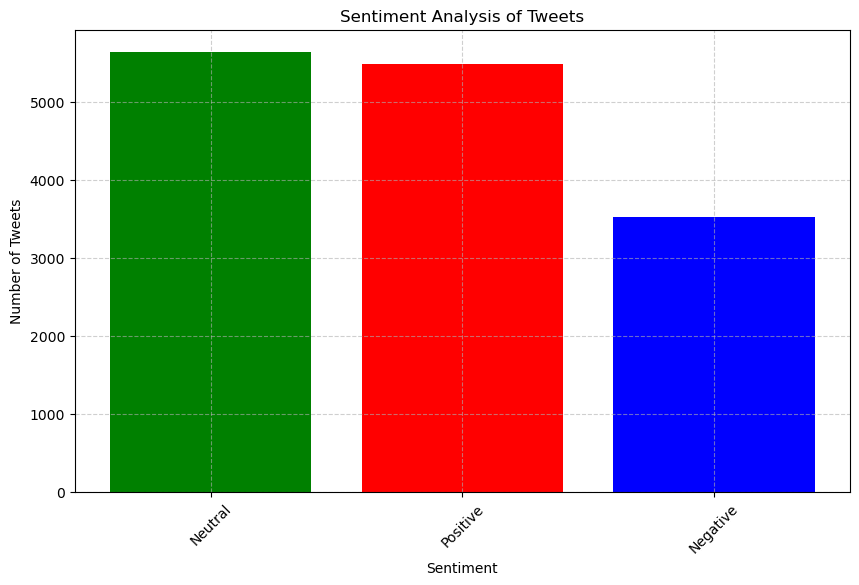

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


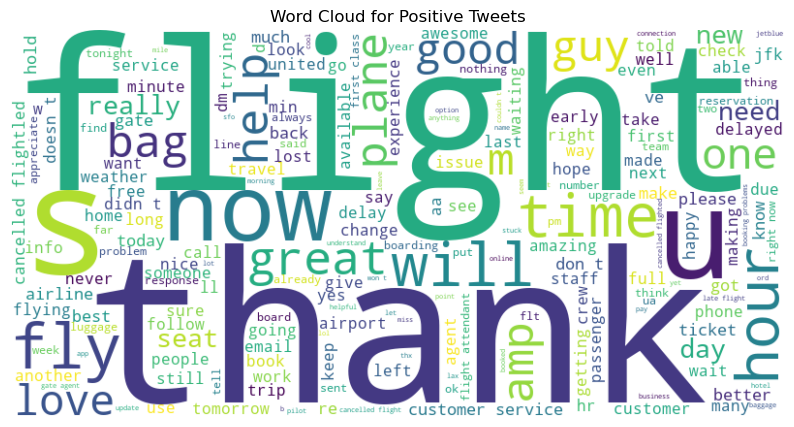

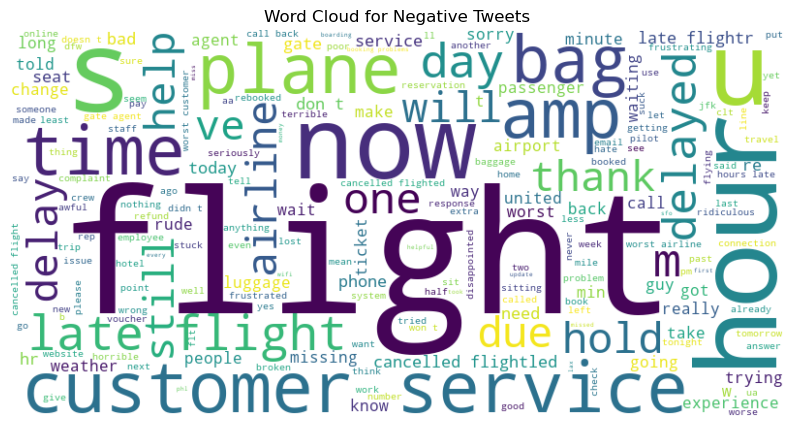

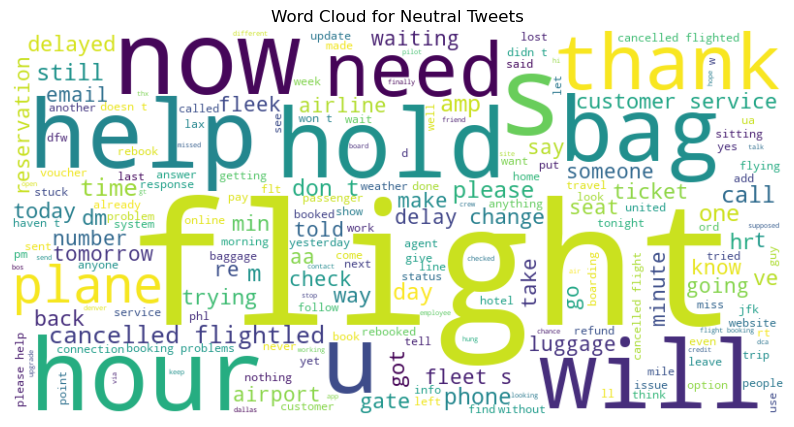

In [45]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    sentiment_texts = df[df['sentiment'] == sentiment]['cleaned_text']
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(sentiment_texts))
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.axis('off')
    plt.show()


In [46]:
sentiment_percentage = (sentiment_counts / len(df)) * 100


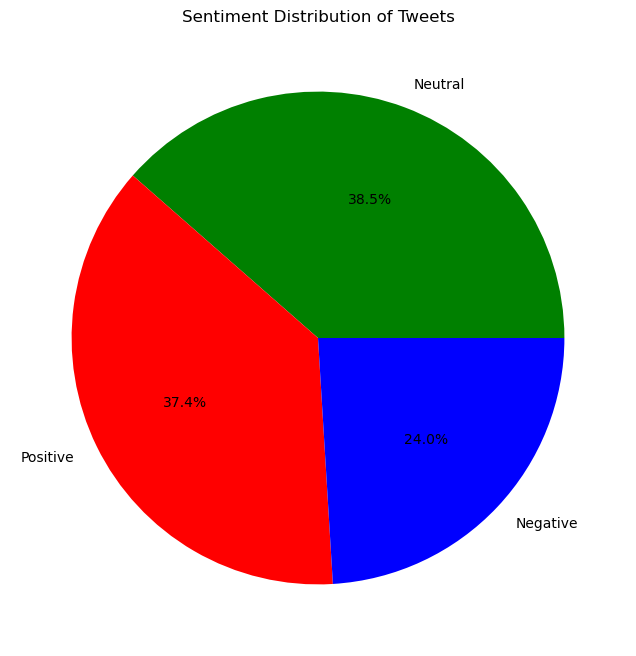

In [50]:
plt.figure(figsize=(8, 8))
plt.pie(sentiment_percentage, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Tweets')
plt.show()